# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

### Создание трех датафреймов - данные за 2018, 2019 и общий.

In [3]:
df_19 = pd.read_csv('2019.csv')
df_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df_19['year'] = 2019

In [5]:
df_18 = pd.read_csv('2018.csv')

In [6]:
df_18['year'] = 2018

In [7]:
all_df = pd.concat([df_18, df_19])
all_df['year'] = all_df['year'].astype('object')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   year                          312 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 26.8+ KB


### На первом этапе определим вероятные связи между показателями с помощью scatter plot matrix

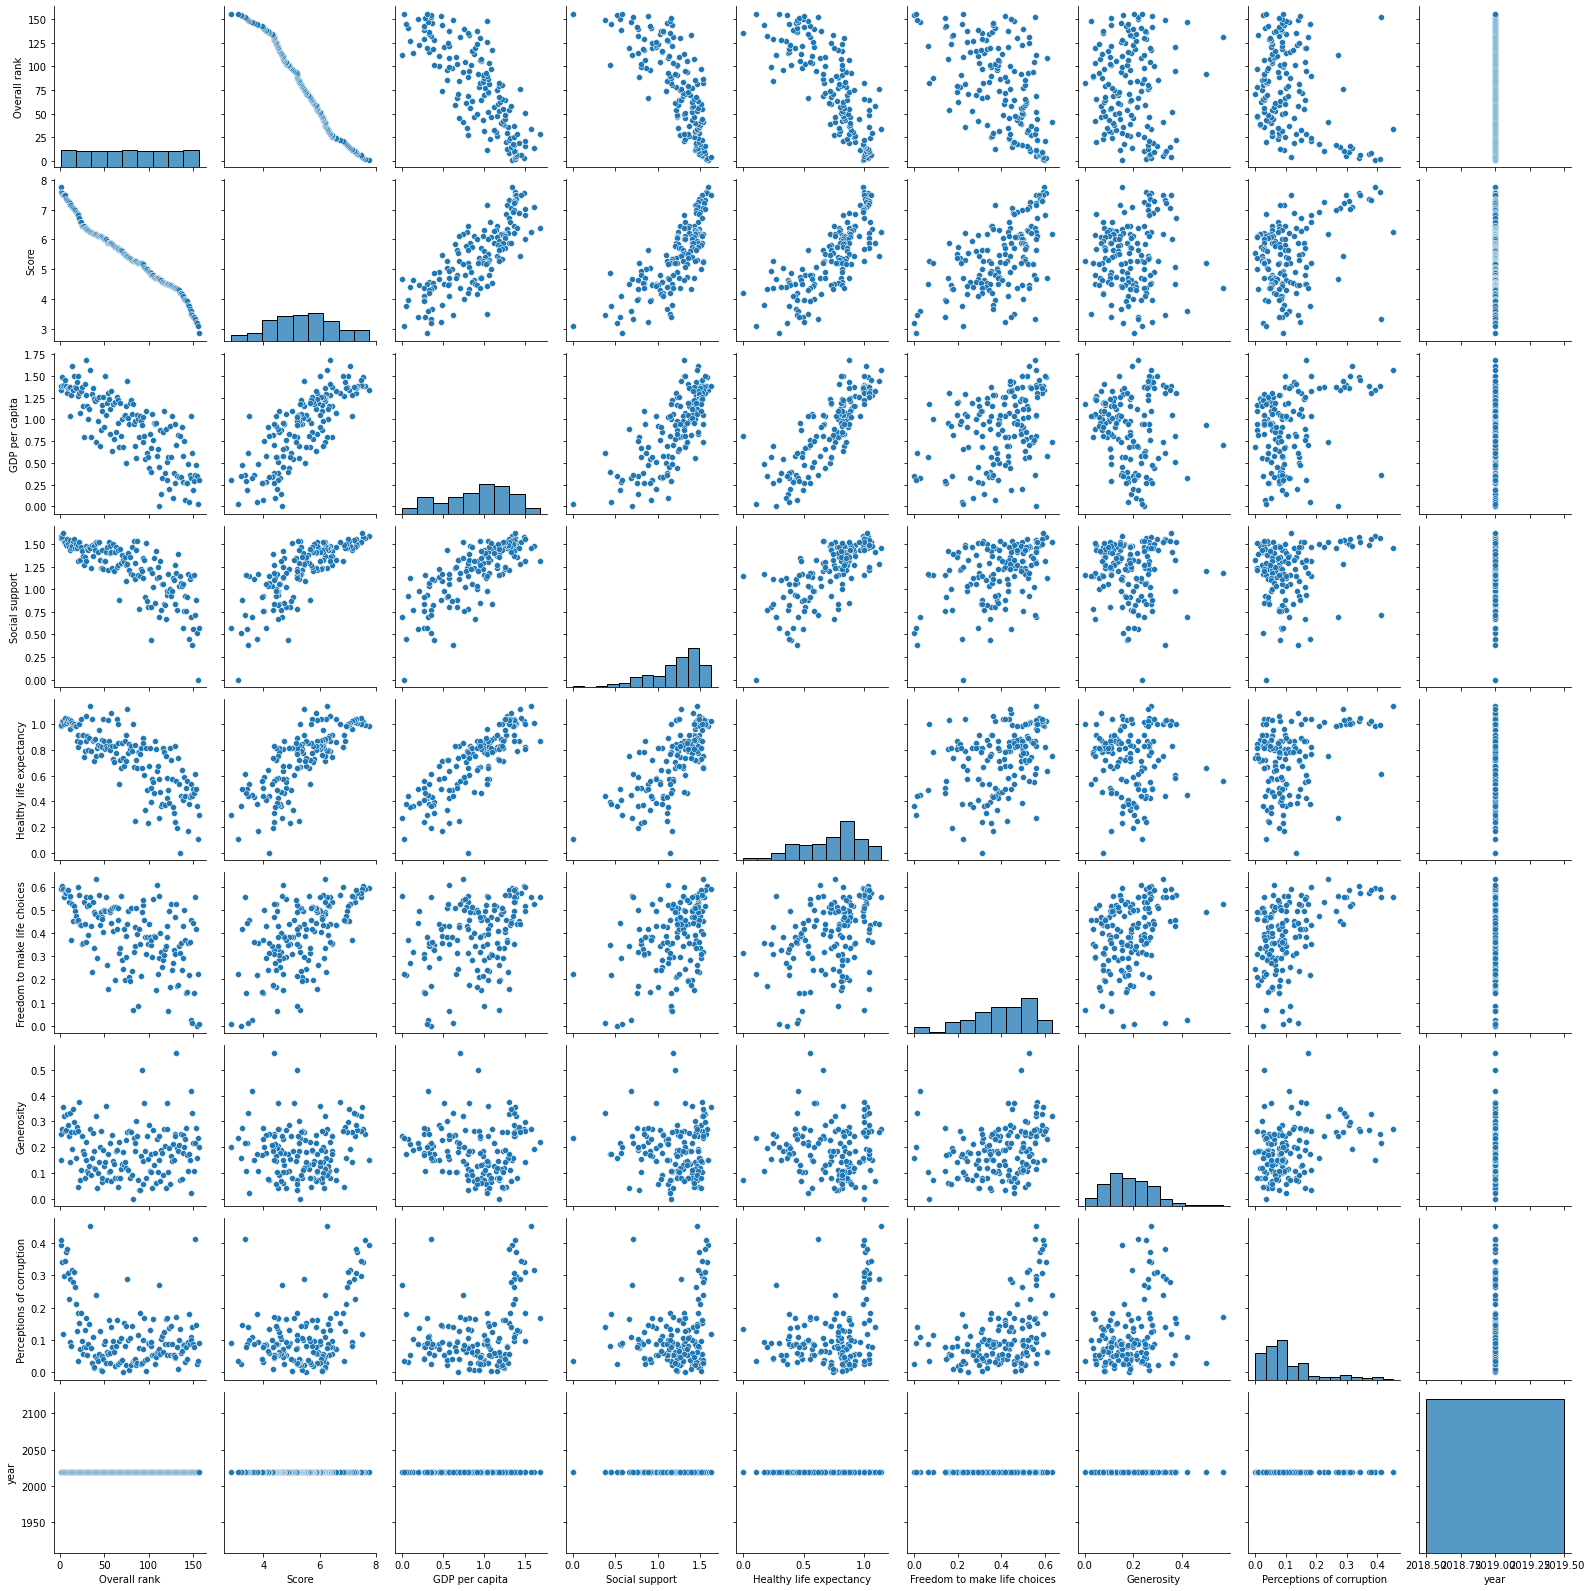

In [26]:
sns.pairplot(df_19)
sns.despine()

В наборе данных за 2019 г. четко прослеживаются практически прямо пропорциональные зависимости между общей оценкой счастья и ВВП на душу населения, социальной поддержкой и продолжительностью здоровой жизни. При этом, свобода выбора хоть и имеет такую же тенденцию, но на первый взгляд среднеквадратичное отклонение гораздо больше, что говорит о более субъективных оценках. Оценка щедрости и коррупции наименее  влияют на общую оценку счастья напрямую.

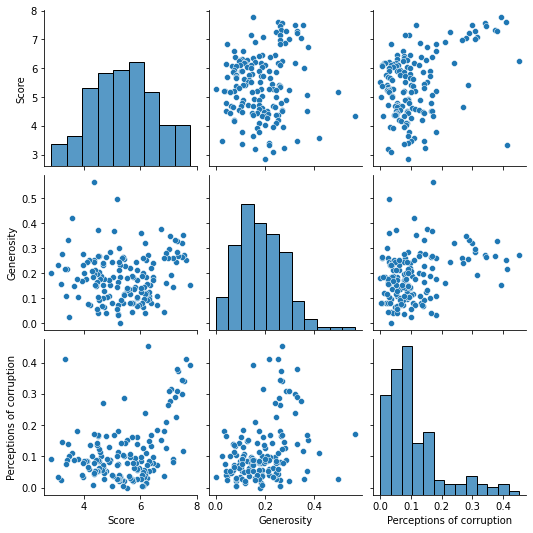

In [28]:
sns.pairplot(df_19[['Score', 'Generosity', 'Perceptions of corruption']])
sns.despine()

При более детальном рассмотрении показателя коррупции наблюдается некоторая неочевидная тенденция - в странах с рейтингом от 0 до 6,5 этот показатель практически не влияет на рейтинг, и прямо пропорциональная зависимость существенно возрастает для стран с рейтингом выше 6,5. Что в общем отражает отношение к корупции и влияние этого показателя на оценку общего счастья в странах с низким и высоким уровнем жизни.

### На втором этапе изучим подробнее взаимосвязь пар численных признаков - общей оценкой счастья и ВВП на душу населения, социальной поддержкой, продолжительностью здоровой жизни и свободой выбора.

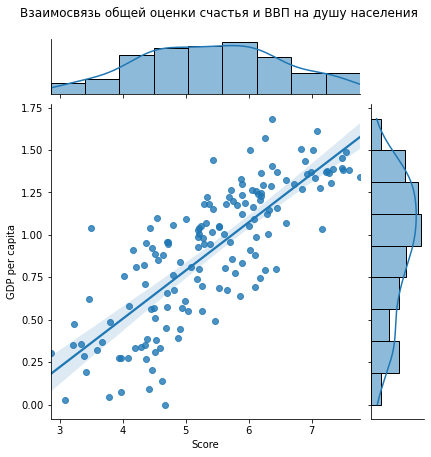

In [30]:
sns.jointplot(x='Score', y='GDP per capita', data=df_19, kind='reg')
plt.suptitle("Взаимосвязь общей оценки счастья и ВВП на душу населения", y=1.05)
sns.despine()

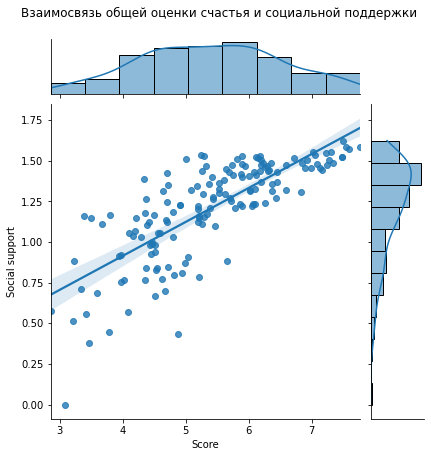

In [32]:
sns.jointplot(x='Score', y='Social support', data=df_19, kind='reg')
plt.suptitle("Взаимосвязь общей оценки счастья и социальной поддержки", y=1.05)
sns.despine()

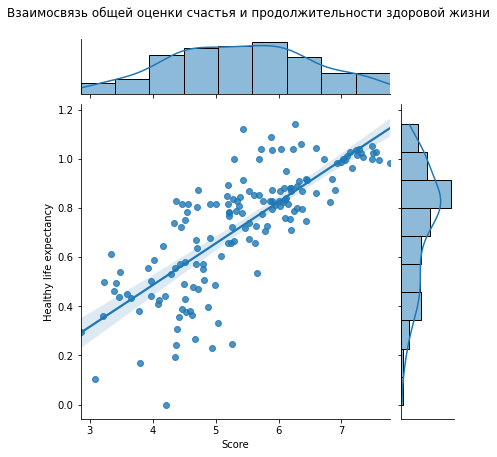

In [33]:
sns.jointplot(x='Score', y='Healthy life expectancy', data=df_19, kind='reg')
plt.suptitle("Взаимосвязь общей оценки счастья и продолжительности здоровой жизни", y=1.05)
sns.despine()

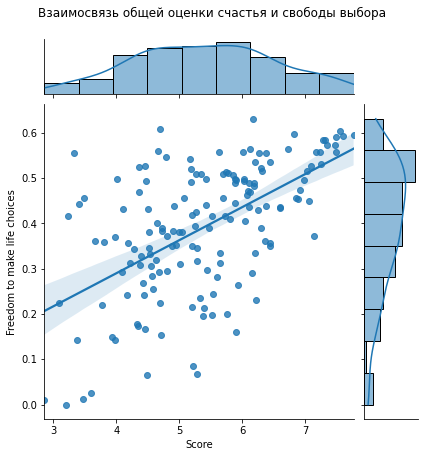

In [34]:
sns.jointplot(x='Score', y='Freedom to make life choices', data=df_19, kind='reg')
plt.suptitle("Взаимосвязь общей оценки счастья и свободы выбора", y=1.05)
sns.despine()

Исходя из диаграмм можно сделать вывод о том, что оценка ВВП на душу населения выставлена наиболее объективно, т.к. у стран с низким уровнем счастья соответственно и низкий показатель ВВП, кроме того на гистограмме его распределение более равномерно, чем другие показатели. Оценки социальной поддержки и свободы выбора смещены влево, что говорит о том, что люди в странах с низким уровнем счастья чаще всего выше оценивают уровень социальной поддержки и свободы выбора, чем могло бы быть исходя из объективной реальности.

### На третьем этапе сравним оценки показателей при помощи boxplot

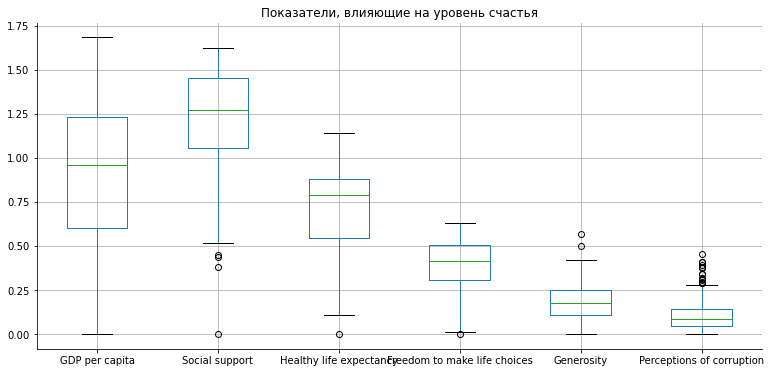

In [35]:
df_19[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]].plot(kind='box',
                   title='Показатели, влияющие на уровень счастья', grid=True)
sns.despine()

Наибольшее число выбросов имеет показатель ощущения коррупции, что говорит о субъективности данной оценки. Наибольшее влияние исходя из размера оценки показателя имеет ВВП на душу населения, социальная поддержка и продолжительность здоровой жизни, наименьшее - показатель ощущения коррупции.

### На четвертом этапе посмотрим, как изменились оценки счастья с 2018 г. по 2019 г. в прервых 20 странах по размеру индекса

In [37]:
all_df_group = all_df[['year', 'Country or region', 'Score']].groupby(['year', 'Country or region']).mean().sort_values(['Score'], ascending=False).head(42)

In [38]:
all_df_p = all_df_group.pivot_table(
                        index='Country or region', 
                        columns='year', 
                        values='Score', 
                        aggfunc='mean')

In [39]:
all_df_p = all_df_p.dropna()

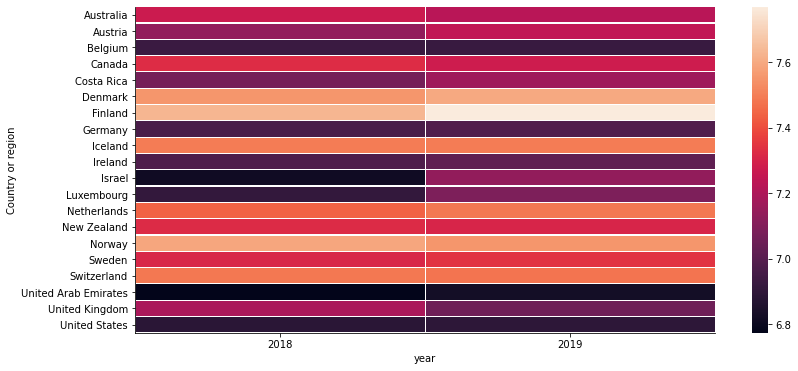

In [40]:
sns.heatmap(all_df_p, linewidths=0.2)
sns.despine()

Стабильно высоким уровень счастья на протяжении двух лет остается в Финляндии, Дании, Исландии, Норвегии и Швейцарии. В Израиле и Люксембурге уровень счастья значительно повысился в 2019 г. по сравнению с 2018 г., а в Англии снизился за тот же период.

### На пятом этапе сравним оценки счастья в первых 10 странах за 2018 и 2019 г.

In [41]:
top_xx = all_df[['year', 'Country or region', 'Score']].groupby(['year', 'Country or region']).mean().sort_values(['Score'], ascending=False)
all_df_xx = top_xx.pivot_table(
                        index='Country or region', 
                        columns='year', 
                        values='Score', 
                        aggfunc='mean')

In [42]:
all_df_xx['New'] = all_df_xx[2018] + all_df_xx[2019]
all_df_xx = all_df_xx.dropna().sort_values(['New'], ascending=False).head(10)

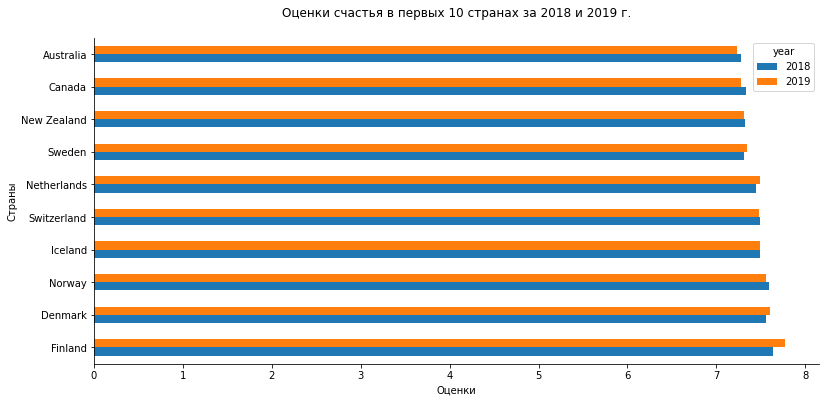

In [54]:
all_df_xx[[2018, 2019]].plot(kind='barh', title = 'Оценки счастья в первых 10 странах за 2018 и 2019 г.\n')
plt.xlabel('Оценки')
plt.ylabel('Страны')
sns.despine()

Самой счастливой страной с возрастающим уровнем счастья является Финляндия.

### На шестом этапе изучим средний "вклад" каждого показателя в общую оценку уровня счастья по всем странам в 2019 г.

In [55]:
df_19_pie = df_19[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean()
df_19_pie

GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

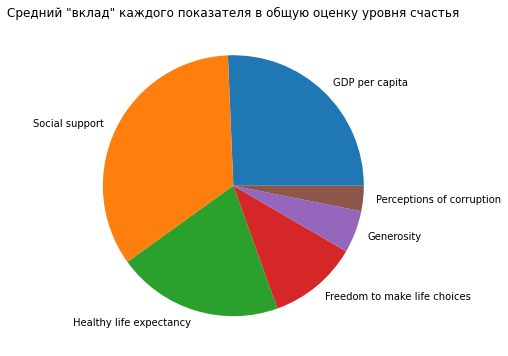

In [57]:
df_19_pie.plot(kind='pie', title='Cредний "вклад" каждого показателя в общую оценку уровня счастья')
plt.ylabel('')
sns.despine()

Как видно из диаграммы в среднем для всех людей всех стран в целом социальная поддержка государства важнее чем наличие работы и высокой зарплаты (ВВП на душу населения).

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.